In [1]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading data
data = pd.read_csv('C:/Users/Mohan/Downloads/Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Standard Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [8]:
data.loc[:,:]=sc.fit_transform(data)

In [9]:
data.describe().round(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.434,-1.433,-3.679,-2.671,-2.088,-2.107,-1.696,-1.868,-2.069,-1.634,-2.095,-1.895,-1.493
25%,-0.788,-0.659,-0.572,-0.689,-0.824,-0.885,-0.828,-0.740,-0.597,-0.795,-0.768,-0.952,-0.785
50%,0.061,-0.423,-0.024,0.002,-0.122,0.096,0.106,-0.176,-0.063,-0.159,0.033,0.238,-0.234
75%,0.836,0.670,0.698,0.602,0.510,0.809,0.849,0.610,0.629,0.494,0.713,0.789,0.758
max,2.260,3.109,3.156,3.155,4.371,2.540,3.063,2.402,3.485,3.435,3.302,1.961,2.971


# K-Means Clustering

In [10]:
from sklearn.cluster import KMeans
wcss = []              # a list to store the inertia value on each iteration using different number of clusters
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', n_init = 10, random_state=101)
    km.fit(data)          
    wcss.append(km.inertia_)
    
wcss

[2314.0,
 1658.7588524290954,
 1277.928488844642,
 1180.3383153270847,
 1109.2925777554487,
 1044.7060044024402,
 989.4727831726524,
 936.2156041380944,
 892.9179275481515,
 860.8501673662387]

### Plotting number of clusters against the inertia for each selection of cluster number to determine the optimum number of clusters for the given data

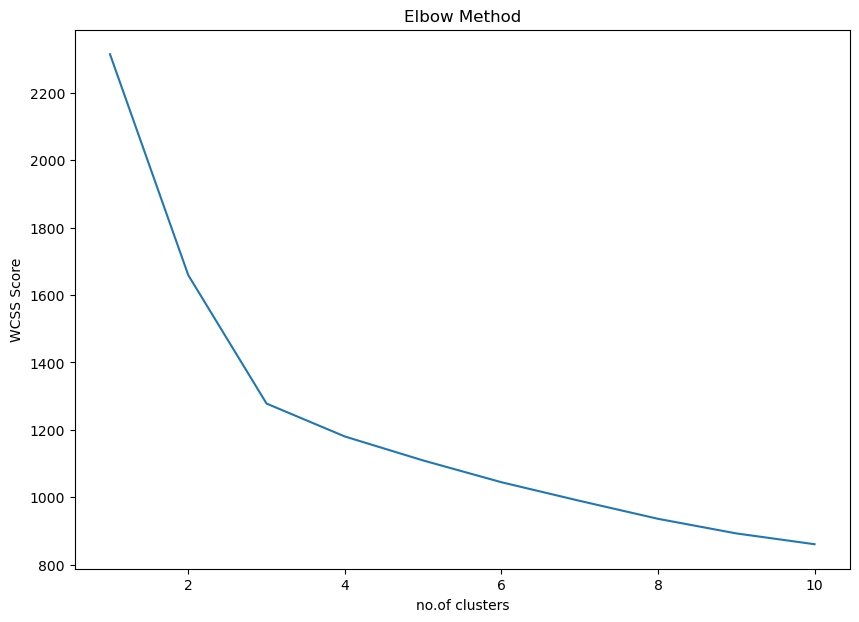

In [11]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS Score')
plt.show()

### From elbow method, we can observe that the optimum number of clusters is 3. So, we cluster the data points into 3 clusters using kmeans clustering

In [12]:
#train my data such that i should get 3 clusters
km = KMeans (n_clusters=3, init = 'k-means++', n_init=10, random_state=101)
km.fit(data)

data1 = data.copy()
data1['km_3']=km.labels_
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


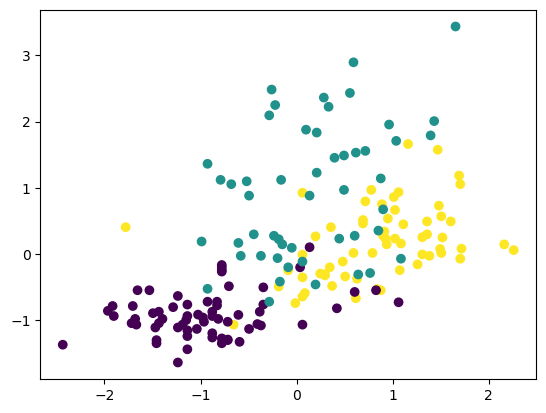

In [13]:
plt.scatter(x=data1['Alcohol'],y=data1['Color_Intensity'], c=data1['km_3'])
plt.show()

# Hierarchical Clustering

In [14]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [16]:
#inter cluster distance matrix
# complete=max , single=min, ward=ward, average=averageskle
mergings = linkage(data, method = "ward")   ### complete - max 

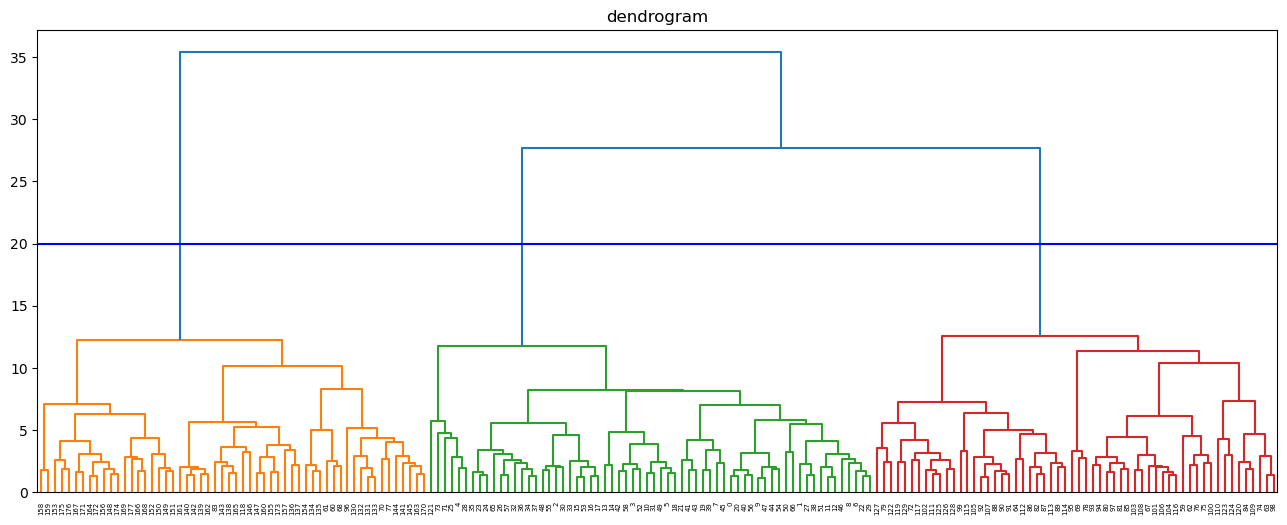

In [17]:
plt.figure(figsize=(16,6))
dendrogram(mergings, labels = data.index, leaf_rotation=90)   ### inter-cluster distance matrix
plt.hlines(20,0,2000,colors="blue" , linestyles="solid") # for the horizontal cut line 
plt.title("dendrogram")
plt.show()

From the dendrogram it is found that the optimum number of clusters is 3. So we shall perform hierarchical clustering using 3 number of clusters

## Agglomerative Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

model_hc = hc.fit(data)
HC_clusters = model_hc.labels_
HC_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [19]:
data2 = data.copy()

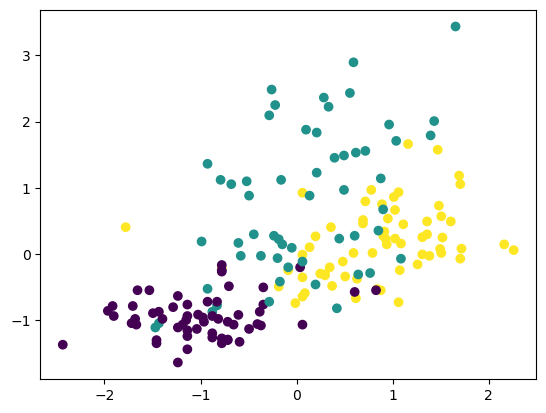

In [20]:
plt.scatter(x=data2['Alcohol'],y=data2['Color_Intensity'],c=HC_clusters)

# OR

In [21]:
from scipy.cluster.hierarchy import fcluster

In [22]:
labels = fcluster(mergings, 20, criterion="distance")
pd.Series(labels).value_counts()

2    64
3    58
1    56
dtype: int64

In [23]:
data2['km_3']=labels
data2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


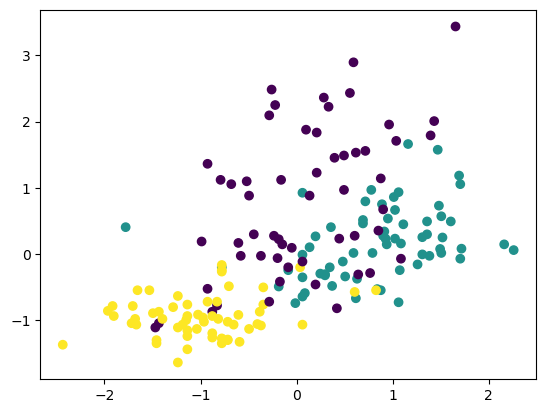

In [24]:
plt.scatter(x=data2['Alcohol'],y=data2['Color_Intensity'], c=data2['km_3'])
plt.show()

# DB Scan Clustering

In [25]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 1, min_samples = 5).fit(data)
cluster = clustering.labels_
len(set(cluster))

1

In [26]:
data3 = data.copy()
data3['db_clusters']= clustering.labels_
data3.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,db_clusters
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1


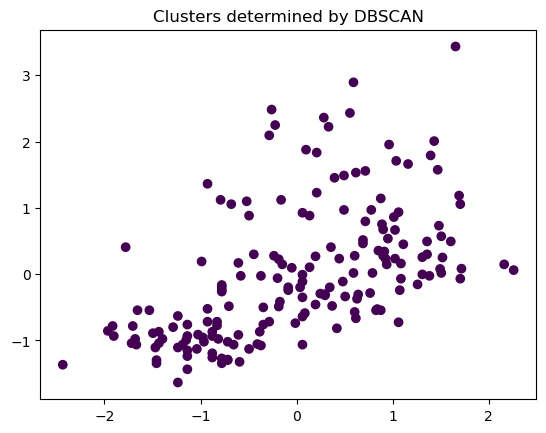

In [27]:
plt.scatter(x=data3['Alcohol'],y=data3['Color_Intensity'], c=data3['db_clusters'])
plt.title("Clusters determined by DBSCAN")
plt.show()